### generate figures and label images for HIOS TDS manuscript

### fig2

Package versions:<br>
python==3.10.8<br>
numpy==1.23.5<br>
matplotlib==3.6.2<br>
ipywidgets==8.0.4<br>
pickleshare==0.7.5<br>
matplotlib_scalebar==0.8.1

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
import pickle

In [3]:
figsize_w = 15/2.54
#fontsize = 12
dpi = 640

In [4]:
img0_path = r"..\data\Figure 2_3_S1\MoS2_on_Si_wafer.png"
img1_path = r"..\data\Figure 2_3_S1\MoS2 scanned area_rotated.png"

data_folder = r"..\data\Figure 2_3_S1\230101205338_20kV_hexz0_camz-10_posi_003_good"

with open(data_folder + r'\20230213_140933scan_data_bin2_shifts.pkl', 'rb') as f:
    data = pickle.load(f)
for i in list(data.keys()):
    exec(i + '= ' + '(data[i])')
data.keys()

dict_keys(['data_ref_folder', 'data_ref_name', 'data_ref_path', 'img_ref_Nx', 'img_ref_Ny', 'scan_ref_Nx', 'scan_ref_Ny', 'scan_ref_N', 'scan_Nx', 'scan_Ny', 'scan_StepWidth', 'fit_scanref_scan_x3', 'fit_scanref_scan_y3', 'fit_x3', 'fit_y3', 'data_sum', 'data_shifted_sum', 'data_shifted_crop_sum', 'calibration_factor_binned', 'cam_pixel_size_binned'])

In [5]:
img0 = plt.imread(img0_path)
img0_pixel_size = 0.01134 ## mm / pix
img1 = plt.imread(img1_path)
img1_pixel_size = 3.05/(537.*2.) # mm /pix
img2 = data_shifted_crop_sum/(scan_Nx*scan_Ny)

In [6]:
scan_length_from_img0 = 2.38 #mm

In [7]:
# scan is distorted slightly due to the low magnification
scan_length_from_4DSTEM_scan = 3.01501e-03 * 192 * 4 #mm
scan_length_from_4DSTEM_scan

2.3155276799999998

In [8]:
scan_area = 2.3e7*2.3e7 #Angstrom -> 2.3*2.3 mm
current = 24.9e-12 # A -> 24.9 pA 
exposure_time = 0.001 #s -> 1 #ms
scan_positions = 192*192
Coulomb = 6.242e18 # electrons
total_electrons = current*exposure_time*scan_positions*Coulomb
np.format_float_scientific(total_electrons/scan_area,3)

'1.083e-05'

In [9]:
total_electrons

5729616691.2

In [10]:
total_electrons/scan_area # Angstrom**2

1.0831033442722116e-05

In [11]:
#e per nm**2
(total_electrons/scan_area * 100)

0.0010831033442722116

In [12]:
#nm**2 per e
1./(total_electrons/scan_area * 100)

923.2729316997422

In [13]:
img0_ratio = img0.shape[1]/img0.shape[0]
img0_ratio

1.3343434343434344

In [14]:
img1_ratio = img1.shape[1]/img1.shape[0]
img1_ratio

1.0

In [15]:
img2_ratio = img2.shape[1]/img2.shape[0]
img2_ratio

1.0

In [16]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [17]:
angle0 = 24.8
r0 = 0; phi0 = 0
r1 = 1; phi1 = 0
r2 = 1; phi2 = angle0 * np.pi/180.
(x0,y0) = pol2cart(r0,phi0)
(x1,y1) = pol2cart(r1,phi1)
(x2,y2) = pol2cart(r2,phi2)

In [18]:
((x0,y0),(x1,y1),(x2,y2))

((0.0, 0.0), (1.0, 0.0), (0.9077774785329087, 0.4194520824461771))

Text(0.02, 0.98, 'c)')

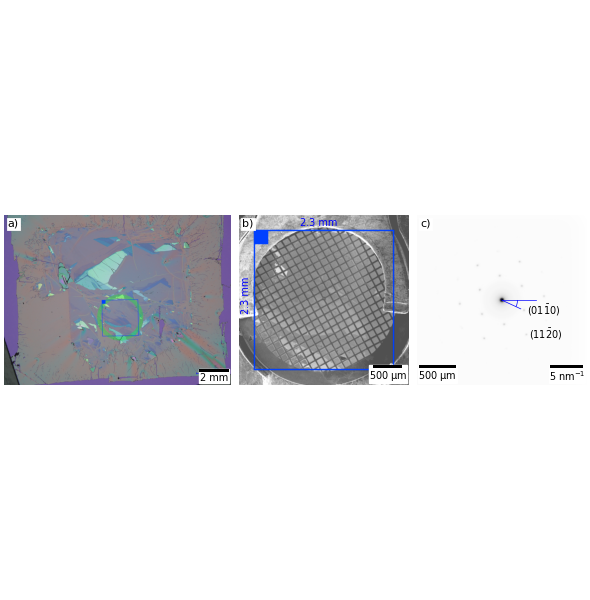

In [19]:
fs0 = 7
fs1 = 8

param1 = {'textcoords': 'axes fraction', 'horizontalalignment': 'left', 'verticalalignment':'top', 'fontsize': fs1,
          'bbox':dict(boxstyle="square,pad=0.0", fc="w", ec="w", lw=2)} #axes points

xy_pos = (0.02,0.98)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (figsize_w,6), 
                                  gridspec_kw={'height_ratios': [1], 'width_ratios': [img0_ratio,img1_ratio, 1]}, constrained_layout=True # facecolor = 'gray'
                                 )
im1 = ax1.imshow(img0)
ax1.axis('off')
ax1.annotate('a)', xy = (0,0), xytext = (xy_pos[0]/img0_ratio, xy_pos[1]), **param1)

scalebar1 = ScaleBar(img0_pixel_size, 'mm', location = 'lower right',sep = 1,pad = 0.0, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax1.add_artist(scalebar1)

im2 = ax2.imshow(img1)
ax2.axis('off')
ax2.annotate('b)', xy = (0,0), xytext = (xy_pos[0]/img1_ratio, xy_pos[1]), **param1)

ax2.annotate('2.3 mm', xy = (0,0), xytext =(484,75), textcoords = 'data', horizontalalignment = 'center', verticalalignment = 'bottom', fontsize=fs0, c = 'b')
ax2.annotate('2.3 mm', xy = (0,0), xytext =(75,484), rotation=90, textcoords = 'data', horizontalalignment = 'right', verticalalignment = 'center', fontsize=fs0, c = 'b')


scalebar2 = ScaleBar(img1_pixel_size, 'mm', location = 'lower right',sep = 1,pad = 0.0, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax2.add_artist(scalebar2)


im3 = ax3.imshow(np.sqrt(img2), cmap = 'Greys', norm=matplotlib.colors.LogNorm())
ax3.axis('off')
#divider = make_axes_locatable(ax3)
#cax3 = divider.append_axes("right", size="3%", pad=0.03)
#plt.colorbar(im3, cax=cax3)
r_angle1 = 40
r_angle0 = 25
center = (99.5, 99.5)

ax3.plot((x0+center[0],x1*r_angle1+center[0]),(y0+center[1],y1*r_angle1+center[1]), 'b', lw = 0.5)# s = 1000, marker= 2, c = 'r',alpha = 1# draw marker
ax3.plot((x0+center[0],x2*r_angle0+center[0]),(y0+center[1],y2*r_angle0+center[1]), 'b', lw = 0.5)# s = 1000, marker= 2, c = 'r',alpha = 1# draw marker
patch0 = matplotlib.patches.Arc(center, width = r_angle0*1.5, height = r_angle0*1.5, theta1 = 0.0, theta2 = angle0, color = 'b', lw = 0.5)
ax3.add_patch(patch0)

ax3.annotate(r'(01$\bar{1}$0)', xy = (0,0), xytext =(126+3,112), textcoords = 'data', horizontalalignment = 'left', verticalalignment = 'center', fontsize=fs0, c = 'black')
ax3.annotate(r'(11$\bar{2}$0)', xy = (0,0), xytext =(129+3,140), textcoords = 'data', horizontalalignment = 'left', verticalalignment = 'center', fontsize=fs0, c = 'black')
#ax3.annotate('[001]', xy = (0,0), xytext =(0.9,0.9), textcoords = 'axes fraction', horizontalalignment = 'center', verticalalignment = 'center', fontsize=fs0, c = 'black')

scalebar3 = ScaleBar(cam_pixel_size_binned, 'µm', location = 'lower left',sep = 1,pad = 0.0, border_pad = 0.1, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) # 1 pixel = 0.2 meter
ax3.add_artist(scalebar3)
scalebar3_rec = ScaleBar(calibration_factor_binned, '1/nm',dimension="si-length-reciprocal",location = 'lower right', sep = 1,pad = 0.0, border_pad = 0.10, length_fraction=0.25, width_fraction = 0.02,font_properties = {'size': fs0}) 
ax3.add_artist(scalebar3_rec)

ax3.annotate('c)', xy = (0,0), xytext = (xy_pos[0]/img2_ratio, xy_pos[1]), **param1)

In [20]:
date_str = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig('fig2_' + date_str + '.png',dpi = dpi,bbox_inches = "tight")